In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def label_week(row):
    week_number = (row.date.day - 1) // 7 + 1
    return f"{row.date.strftime('%B')}: Week_{week_number}"

uscities = pd.read_csv("https://cdn.jsdelivr.net/gh/abp6cm/internet_traffic@main/uscities.csv")
uscities2 = pd.read_csv("https://cdn.jsdelivr.net/gh/abp6cm/internet_traffic@main/uscities2.csv")
traffic = pd.read_csv("https://cdn.jsdelivr.net/gh/abp6cm/internet_traffic@main/traffic.csv")
bad_traffic = pd.read_csv("/Users/epw9kz/Documents/epw9kz/spring/NetSec/project/codes/new_bad_traffic.csv")
real_loc = pd.read_csv("https://cdn.jsdelivr.net/gh/abp6cm/internet_traffic@main/cleaned_large_dataset.csv")

traffic = traffic.rename(columns={'count': 'outgoing_routes'})
bad_traffic = bad_traffic.rename(columns={'count': 'bad_routes'})

traffic.columns = [col.lower() for col in traffic.columns]
bad_traffic.columns = [col.lower() for col in bad_traffic.columns]

traffic = traffic.merge(bad_traffic[['date', 'origin', 'destination', 'bad_routes']], on=['date', 'origin', 'destination'], how='left')
traffic['bad_routes'] = traffic['bad_routes'].fillna(0)

traffic['date'] = pd.to_datetime(traffic['date'])
dates = np.unique(traffic['date'])
traffic['month'] = traffic['date'].dt.month_name().astype(str)
traffic['week'] = traffic.apply(label_week, axis=1)

# getting original location
uscities.drop(['latitude', 'longitude'], axis=1, inplace=True)
uscities = pd.merge(uscities, real_loc, left_on='iata_to', right_on='ASN', how='left')
uscities = uscities.drop('ASN', axis=1)
uscities = uscities .rename(columns={'state_id': 'dest_state_id', 'state_name': 'dest_state_name', 
                                   'latitude': 'dest_latitude', 'longitude': 'dest_longitude'})

traffic = pd.merge(traffic, uscities, left_on='destination', right_on='iata_to', how='left')
traffic = traffic.drop(['iata_to'], axis=1)

# repeating rows according to the outgoing_routes
# traffic = traffic.loc[traffic.index.repeat(traffic['outgoing_routes'])].reset_index(drop=True)
# traffic['outgoing_routes'] = 1

# print(traffic.shape)
traffic = traffic.dropna(subset=['dest_state_name'])
# print(traffic.shape)
# traffic.to_csv('check_traffic.csv', index=False)

print(traffic.isna().sum())

date                  0
origin                0
destination           0
outgoing_routes       0
bad_routes            0
month                 0
week                  0
dest_state_id         0
dest_state_name       0
dest_latitude      1639
dest_longitude     1639
dtype: int64


In [67]:
# uscities = pd.read_csv("https://cdn.jsdelivr.net/gh/abp6cm/internet_traffic@main/uscities.csv")
traffic.head(30)

,date,origin,destination,outgoing_routes,bad_routes,month,week,dest_state_id,dest_state_name,dest_latitude,dest_longitude
0,2006-07-01,0,701,1,0.0,July,July: Week_1,CA,California,21.4221,-158.0050
1,2006-07-01,0,714,1,0.0,July,July: Week_1,IA,Iowa,21.3069,-157.8580
2,2006-07-01,0,1239,1,0.0,July,July: Week_1,IL,Illinois,38.9232,-77.2309
3,2006-07-01,0,1680,1,0.0,July,July: Week_1,MO,Missouri,30.1116,-97.3651
5,2006-07-01,0,3320,1,0.0,July,July: Week_1,MN,Minnesota,34.0522,-118.2440
6,2006-07-01,0,3561,1,0.0,July,July: Week_1,CA,California,66.9626,-156.8810
7,2006-07-01,0,3561,1,0.0,July,July: Week_1,CA,California,66.9626,-156.8810
8,2006-07-01,0,3561,1,0.0,July,July: Week_1,CA,California,66.9626,-156.8810
9,2006-07-01,0,3561,1,0.0,July,July: Week_1,CA,California,66.9626,-156.8810
10,2006-07-01,0,3561,1,0.0,July,July: Week_1,CA,California,66.9626,-156.8810


## states vs routes

/var/folders/y2/b42hx8z947b340l497wq1g4r0000gp/T/ipykernel_78501/4194463492.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(state_data['dest_state_name'], rotation=90)


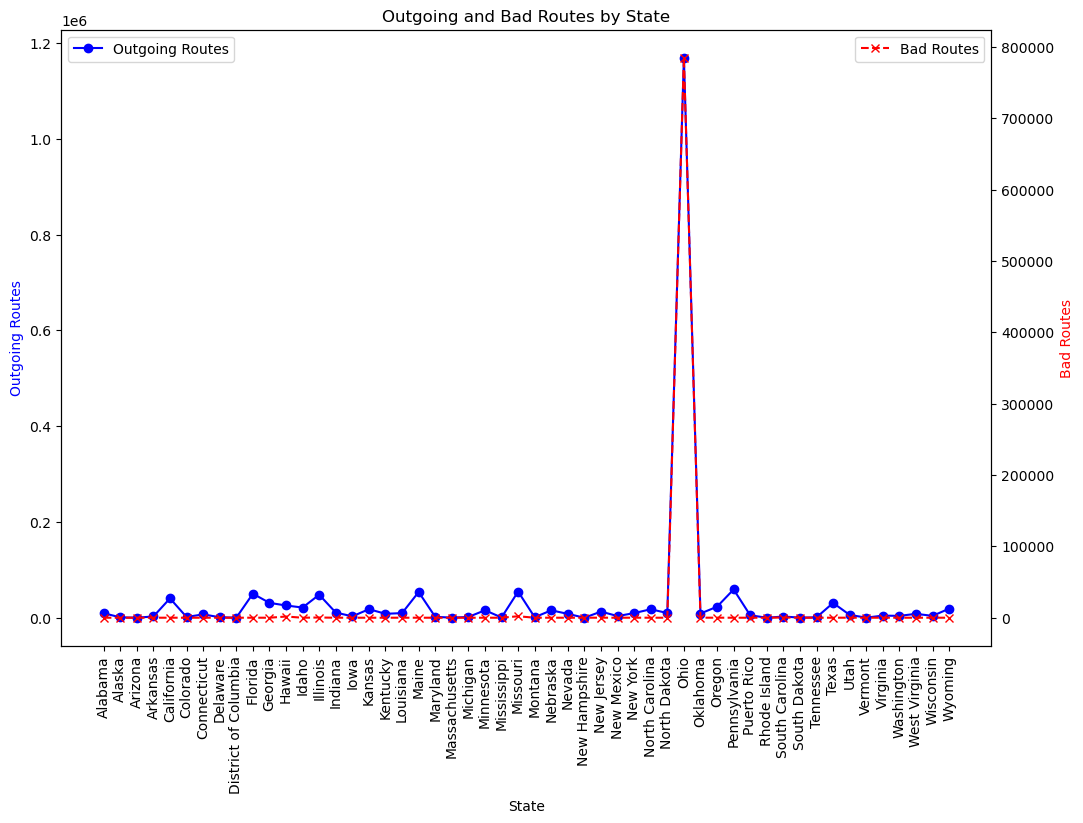

In [163]:
state_data = traffic.groupby('dest_state_name').agg({
    'outgoing_routes': 'sum',
    'bad_routes': 'sum'
}).reset_index()


fig, ax1 = plt.subplots(figsize=(12, 8))

ax2 = ax1.twinx()

ax1.plot(state_data['dest_state_name'], state_data['outgoing_routes'], color='blue', marker='o', label='Outgoing Routes')
ax2.plot(state_data['dest_state_name'], state_data['bad_routes'], color='red', marker='x', label='Bad Routes', linestyle='--')

ax1.set_xlabel('State')
ax1.set_ylabel('Outgoing Routes', color='blue')
ax2.set_ylabel('Bad Routes', color='red')
ax1.set_title('Outgoing and Bad Routes by State')

ax1.set_xticklabels(state_data['dest_state_name'], rotation=90)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.savefig('state_vs_routes.png')

plt.show()

In [179]:
# # states = traffic['dest_state_name'].unique()
# # print(len(states))

# custom_order = [
#     'Alaska', 'Hawaii', 'Washington', 'Oregon', 'California', 'Nevada', 'Idaho',
#     'Montana', 'Wyoming', 'Utah', 'Colorado', 'Arizona', 'New Mexico',
#     'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Oklahoma', 'Minnesota', 'Iowa', 'Missouri', 'Arkansas',
#     'Texas', 'Louisiana', 'Mississippi', 'Alabama', 'Georgia', 'Florida',
#     'Wisconsin', 'Illinois', 'Michigan', 'Indiana', 'Ohio', 'Kentucky', 'Tennessee',
#     'West Virginia', 'Virginia', 'Maryland', 'Delaware', 'Pennsylvania', 'New Jersey', 'New York', 'Connecticut', 'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire', 'Maine',
#     'North Carolina', 'South Carolina', 'District of Columbia', 'Puerto Rico'
# ]
# # print(len(geographical_order))

# # Create a categorical type based on this order for sorting purposes
# state_data['dest_state_name'] = pd.Categorical(state_data['dest_state_name'], categories=custom_order, ordered=True)

# # Sort by the new categorical data
# state_data.sort_values('dest_state_name', inplace=True)

# # Now plotting
# fig, ax1 = plt.subplots(figsize=(12, 8))

# ax2 = ax1.twinx()

# ax1.plot(state_data['dest_state_name'], state_data['outgoing_routes'], color='blue', marker='o', label='Outgoing Routes')
# ax2.plot(state_data['dest_state_name'], state_data['bad_routes'], color='red', marker='x', label='Bad Routes', linestyle='--')

# ax1.set_xlabel('State')
# ax1.set_ylabel('Outgoing Routes', color='blue')
# ax2.set_ylabel('Bad Routes', color='red')
# ax1.set_title('Outgoing and Bad Routes by State')

# ax1.set_xticklabels(state_data['dest_state_name'], rotation=90)

# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

# plt.savefig('geosort_state_vs_routes.png')
# plt.show()

In [181]:
# import altair as alt
# from vega_datasets import data
# # from altair_saver import save
# alt.data_transformers.disable_max_rows()

# filtered_traffic = traffic[traffic['dest_state_name'].isin(selective_states)]

# filtered_traffic = filtered_traffic[['destination','dest_state_name', 'dest_latitude', 'dest_longitude']]
# filtered_traffic = filtered_traffic.rename(columns={'dest_state_name': 'state', 'dest_latitude': 'latitude', 'dest_longitude': 'longitude'})

# states = alt.topo_feature(data.us_10m.url, feature='states')

# # US states background
# background = alt.Chart(states).mark_geoshape(
#     fill="lightgray",
#     stroke="white"
# ).properties(
#     width=750,
#     height=500
# ).project("albersUsa")
# # Create pointerover selection
# select_city = alt.selection_point(
#     on="pointerover", nearest=True, fields=["origin"], empty=False
# )

# state_points = alt.Chart(filtered_traffic).mark_circle(
#     size=10,
#     color='steelblue'
# ).encode(
#     longitude='longitude:Q',
#     latitude='latitude:Q',
#     tooltip=['state']
# )

# # (background + state_points).save('selective_states_on_map.png')

# background + state_points

## time vs routes

### weekly routes

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def label_week(row):
    week_number = (row.date.day - 1) // 7 + 1
    return f"{row.date.strftime('%B')}: Week_{week_number}"

uscities = pd.read_csv("https://cdn.jsdelivr.net/gh/abp6cm/internet_traffic@main/uscities.csv")
uscities2 = pd.read_csv("https://cdn.jsdelivr.net/gh/abp6cm/internet_traffic@main/uscities2.csv")
traffic = pd.read_csv("https://cdn.jsdelivr.net/gh/abp6cm/internet_traffic@main/traffic.csv")
bad_traffic = pd.read_csv("/Users/epw9kz/Documents/epw9kz/spring/NetSec/project/codes/new_bad_traffic.csv")
real_loc = pd.read_csv("https://cdn.jsdelivr.net/gh/abp6cm/internet_traffic@main/cleaned_large_dataset.csv")

traffic = traffic.rename(columns={'count': 'outgoing_routes'})
bad_traffic = bad_traffic.rename(columns={'count': 'bad_routes'})

traffic.columns = [col.lower() for col in traffic.columns]
bad_traffic.columns = [col.lower() for col in bad_traffic.columns]

traffic = traffic.merge(bad_traffic[['date', 'origin', 'destination', 'bad_routes']], on=['date', 'origin', 'destination'], how='left')
traffic['bad_routes'] = traffic['bad_routes'].fillna(0)

traffic['date'] = pd.to_datetime(traffic['date'])
dates = np.unique(traffic['date'])
traffic['month'] = traffic['date'].dt.month_name().astype(str)
traffic['week'] = traffic.apply(label_week, axis=1)

# getting original location
uscities.drop(['latitude', 'longitude'], axis=1, inplace=True)
uscities = pd.merge(uscities, real_loc, left_on='iata_to', right_on='ASN', how='left')
uscities = uscities.drop('ASN', axis=1)
uscities = uscities .rename(columns={'state_id': 'dest_state_id', 'state_name': 'dest_state_name', 
                                   'latitude': 'dest_latitude', 'longitude': 'dest_longitude'})

traffic = pd.merge(traffic, uscities, left_on='destination', right_on='iata_to', how='left')
traffic = traffic.drop(['iata_to', 'dest_latitude', 'dest_longitude'], axis=1)

# repeating rows according to the outgoing_routes
# traffic = traffic.loc[traffic.index.repeat(traffic['outgoing_routes'])].reset_index(drop=True)
# traffic['outgoing_routes'] = 1

# print(traffic.shape)
traffic = traffic.dropna(subset=['dest_state_name'])
# print(traffic.shape)
# traffic.to_csv('check_traffic.csv', index=False)

print(traffic.isna().sum())

date               0
origin             0
destination        0
outgoing_routes    0
bad_routes         0
month              0
week               0
dest_state_id      0
dest_state_name    0
dtype: int64


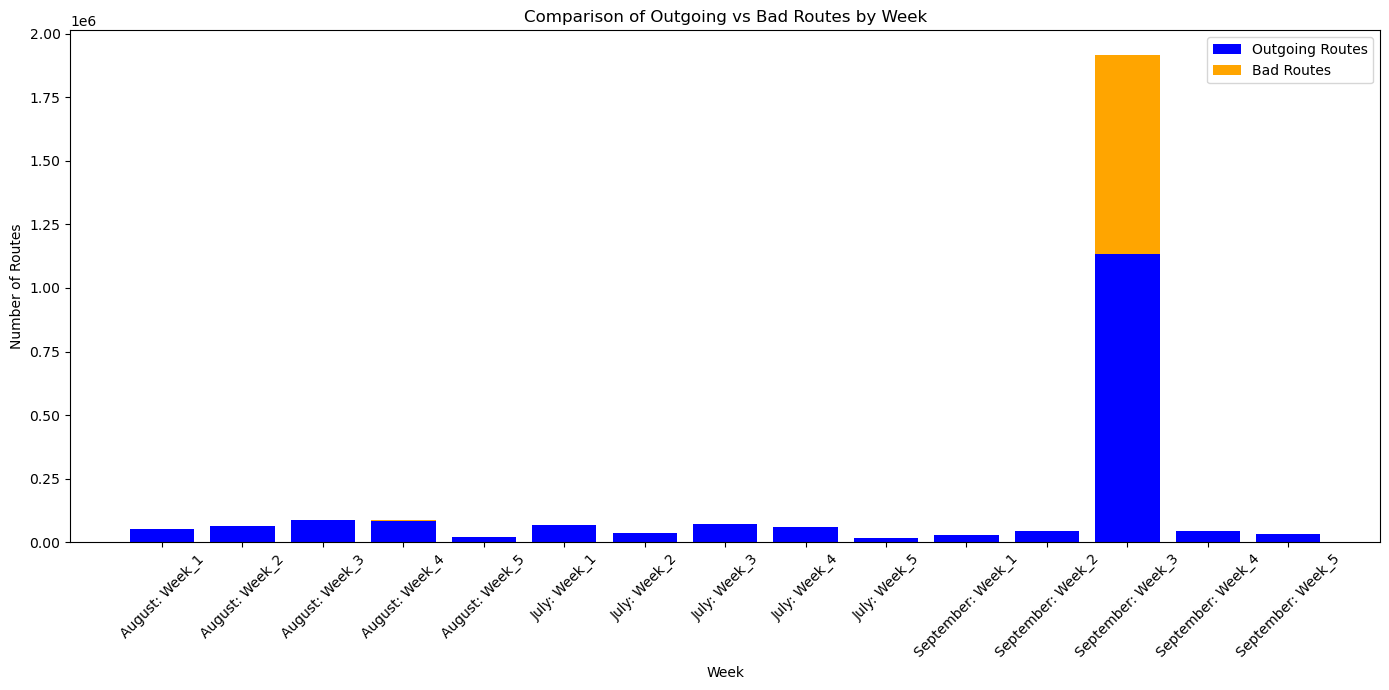

In [167]:
traffic_agg = traffic.groupby('week')['outgoing_routes'].sum().reset_index()
bad_traffic_agg = traffic.groupby('week')['bad_routes'].sum().reset_index()

# Merge the aggregated data on 'week'
merged_data = pd.merge(traffic_agg, bad_traffic_agg, on='week', how='outer').fillna(0)

# Plot the merged data
plt.figure(figsize=(14, 7))

# Bar chart for 'outgoing_routes'
plt.bar(merged_data['week'], merged_data['outgoing_routes'], label='Outgoing Routes', color='blue')

# Bar chart for 'bad_routes'
plt.bar(merged_data['week'], merged_data['bad_routes'], label='Bad Routes', color='orange', bottom=merged_data['outgoing_routes'])

plt.xlabel('Week')
plt.ylabel('Number of Routes')
plt.title('Comparison of Outgoing vs Bad Routes by Week')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout

plt.savefig('week_vs_routes.png')

# Display the plot
plt.show()

### daily routes

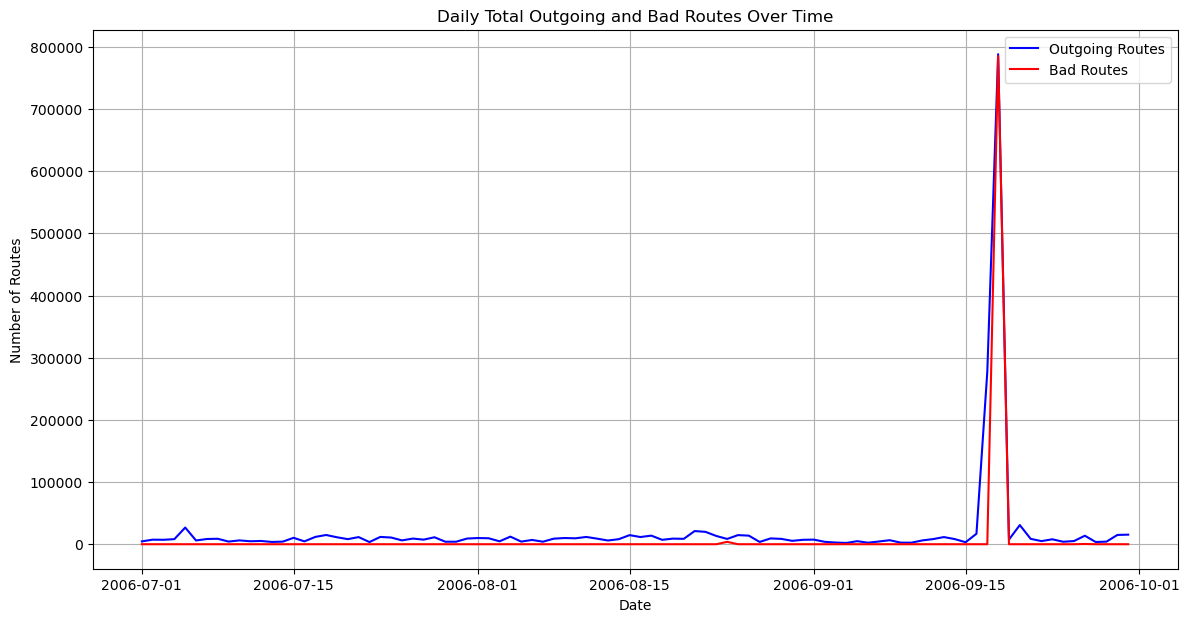

In [168]:
traffic['date'] = pd.to_datetime(traffic['date'])
# Aggregate data by date
daily_data = traffic.groupby('date').agg({
    'outgoing_routes': 'sum',
    'bad_routes': 'sum'
}).reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

plt.plot(daily_data['date'], daily_data['outgoing_routes'], label='Outgoing Routes', color='blue')
plt.plot(daily_data['date'], daily_data['bad_routes'], label='Bad Routes', color='red')

plt.title('Daily Total Outgoing and Bad Routes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Routes')
plt.legend()
plt.grid(True)

plt.savefig('daily_routes.png')
plt.show()


## origin vs destination

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

traffic = pd.read_csv("https://cdn.jsdelivr.net/gh/abp6cm/internet_traffic@main/traffic.csv")
bad_traffic = pd.read_csv("/Users/epw9kz/Documents/epw9kz/spring/NetSec/project/codes/new_bad_traffic.csv")

traffic = traffic.rename(columns={'count': 'outgoing_routes'})
bad_traffic = bad_traffic.rename(columns={'count': 'bad_routes'})

traffic.columns = [col.lower() for col in traffic.columns]
bad_traffic.columns = [col.lower() for col in bad_traffic.columns]

traffic = traffic.merge(bad_traffic[['date', 'origin', 'destination', 'bad_routes']], on=['date', 'origin', 'destination'], how='left')
traffic['bad_routes'] = traffic['bad_routes'].fillna(0)

traffic['date'] = pd.to_datetime(traffic['date'])
dates = np.unique(traffic['date'])
traffic['month'] = traffic['date'].dt.month_name().astype(str)
traffic['week'] = traffic.apply(label_week, axis=1)
# traffic.head(30)

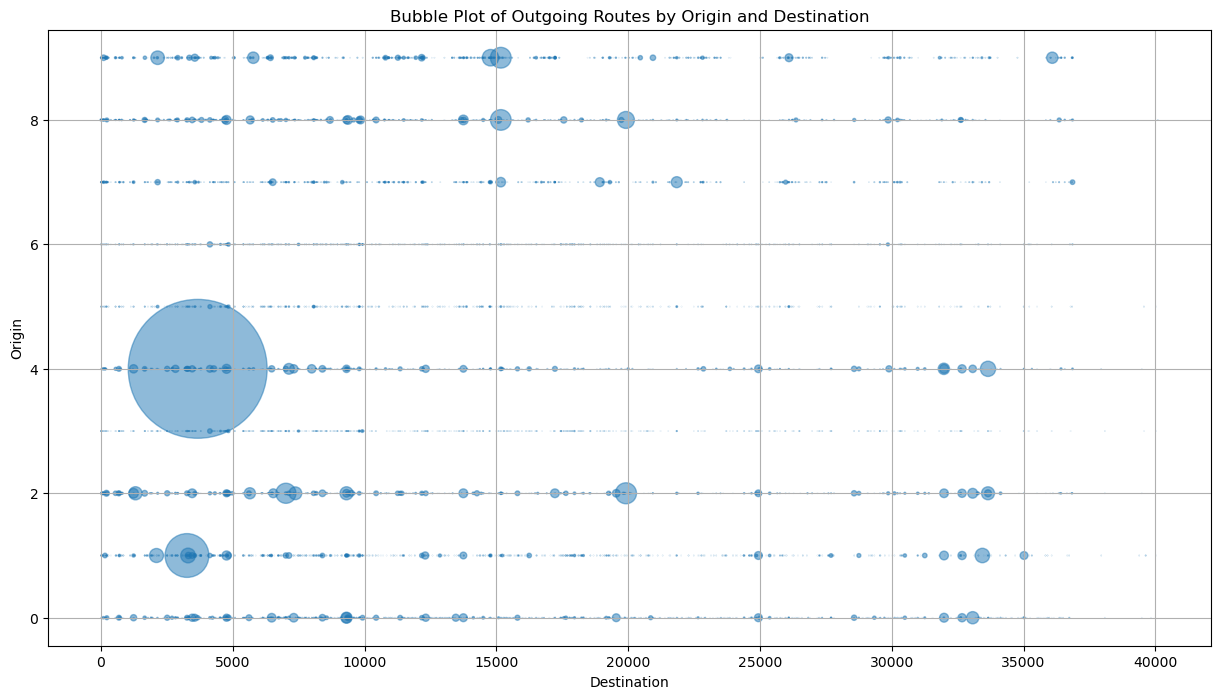

In [174]:
traffic = traffic.sort_values(by=['destination', 'date'], ascending=[True, True])

# print(np.unique(traffic['origin']).min(), np.unique(traffic['origin']).max())
# print(np.unique(traffic['destination']).min(), np.unique(traffic['destination']).max())

grouped_data = traffic.groupby(['origin', 'destination'])['outgoing_routes'].sum().reset_index()
max_outgoing_routes = grouped_data['outgoing_routes'].max()
constant_factor = max_outgoing_routes / 10000
bubble_size = grouped_data['outgoing_routes'] / constant_factor

plt.figure(figsize=(15, 8))

# Create the scatter plot.
# The 's' parameter controls the size of the scatter bubbles.
plt.scatter(grouped_data['destination'], grouped_data['origin'], s=bubble_size, alpha=0.5)

plt.xlabel('Destination')
plt.ylabel('Origin')
plt.title('Bubble Plot of Outgoing Routes by Origin and Destination')
plt.grid(True)
plt.savefig('Bubble Plot of Outgoing Routes by Origin and Destination.png')
plt.show()

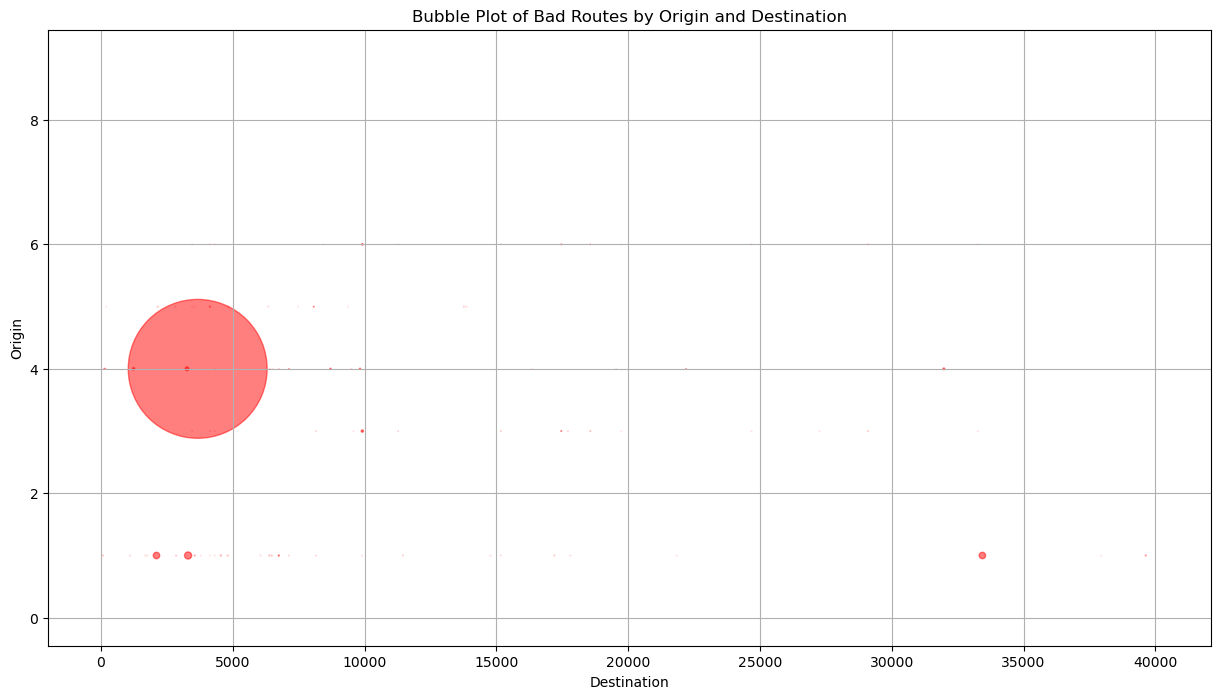

In [173]:
grouped_data = traffic.groupby(['origin', 'destination'])['bad_routes'].sum().reset_index()
max_outgoing_routes = grouped_data['bad_routes'].max()
constant_factor = max_outgoing_routes / 10000
bubble_size = grouped_data['bad_routes'] / constant_factor

plt.figure(figsize=(15, 8))

# Create the scatter plot.
# The 's' parameter controls the size of the scatter bubbles.
plt.scatter(grouped_data['destination'], grouped_data['origin'], s=bubble_size, color='red', alpha=0.5)

plt.xlabel('Destination')
plt.ylabel('Origin')
plt.title('Bubble Plot of Bad Routes by Origin and Destination')
plt.grid(True)
plt.savefig('Bubble Plot of Bad Routes by Origin and Destination.png')
plt.show()